In [1]:
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [5]:
X,y = make_regression(
    n_samples = 100, n_features= 1, n_informative= 1, n_targets= 1, noise = 20, random_state = 42)

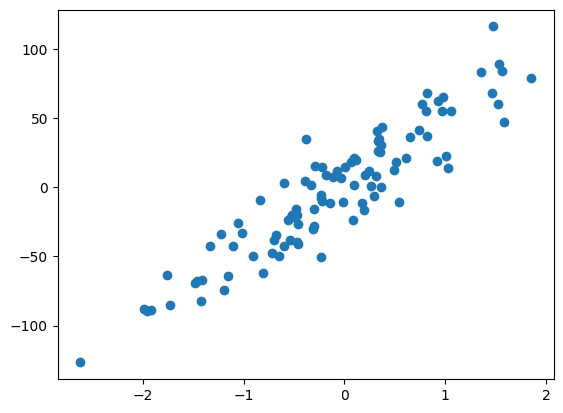

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression 

In [8]:
lr = LinearRegression()

lr.fit(X,y) 


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
lr.intercept_ , lr.coef_

(2.3302306410539453, array([47.13323967]))

In [32]:
class GDregressor: 
    def __init__(self,epochs,learning_rate): 
        self.m = 1
        self.b = 0 
        self.epochs = epochs 
        self.learning_rate = learning_rate 
    def fit(self,X,y): 
        for i in range(self.epochs): 
            loss_slope_b = -2*np.sum(y- self.m*X.ravel() - self.b)
            loss_slope_m = -2*np.sum((y- self.m*X.ravel() - self.b)*X.ravel())
            self.b = self.b - self.learning_rate*loss_slope_b
            self.m = self.m - self.learning_rate*loss_slope_m
            print(f"{loss_slope_b:.2f} {self.b:.2f} {loss_slope_m:.2f} {self.m:.2f}")
        print(self.m,self.b)

    def predict(self,X): 
        return self.m*X + self.b


In [33]:
gd = GDregressor(50,0.001)
gd.fit(X,y)

492.11 -0.49 -7584.87 8.58
236.15 -0.73 -6319.64 14.90
57.67 -0.79 -5269.08 20.17
-63.30 -0.72 -4396.06 24.57
-141.94 -0.58 -3669.99 28.24
-189.78 -0.39 -3065.70 31.31
-215.49 -0.18 -2562.39 33.87
-225.61 0.05 -2142.89 36.01
-225.00 0.28 -1793.01 37.80
-217.24 0.49 -1501.01 39.30
-204.97 0.70 -1257.16 40.56
-190.08 0.89 -1053.41 41.62
-173.94 1.06 -883.06 42.50
-157.50 1.22 -740.56 43.24
-141.38 1.36 -621.30 43.86
-126.01 1.49 -521.43 44.38
-111.63 1.60 -437.77 44.82
-98.40 1.70 -367.66 45.19
-86.36 1.78 -308.87 45.50
-75.50 1.86 -259.55 45.76
-65.79 1.92 -218.18 45.97
-57.16 1.98 -183.44 46.16
-49.54 2.03 -154.28 46.31
-42.84 2.07 -129.78 46.44
-36.97 2.11 -109.20 46.55
-31.84 2.14 -91.90 46.64
-27.38 2.17 -77.35 46.72
-23.51 2.19 -65.12 46.78
-20.16 2.21 -54.84 46.84
-17.27 2.23 -46.18 46.89
-14.77 2.25 -38.90 46.92
-12.63 2.26 -32.77 46.96
-10.78 2.27 -27.61 46.98
-9.20 2.28 -23.26 47.01
-7.84 2.29 -19.61 47.03
-6.68 2.29 -16.53 47.04
-5.69 2.30 -13.93 47.06
-4.84 2.30 -11.74 47.07


In [48]:
y_pred1 = gd.predict(X)


In [49]:
from sklearn.metrics import r2_score

r2_score(y,y_pred1)

0.8531541774966872

In [56]:
print(y,end="\n")
print(y_pred1)

[ 6.26872020e+01 -2.37639807e+01 -2.56867658e+01  7.93645654e+00
 -1.54754945e+01  3.60939588e+01 -4.07942011e+01 -1.08230392e+01
  2.14147070e+01  2.27986221e+01  3.72243519e+01  8.95671291e+01
  4.15511282e+01  1.50182931e+01 -6.18755179e+01  2.14036667e+01
 -8.91095732e+01  1.86789111e+01  1.42342255e+01 -1.26703865e+02
  1.28230663e+01  1.56947595e+00 -3.92917960e+01  1.89495791e+01
  8.41206595e+01  6.79742116e+01  3.03278631e+00  6.99430659e+00
 -4.27287124e+01 -7.42680785e+01  2.56654717e+01  4.33623631e+01
  6.37427951e-01 -2.12731725e+01 -4.93961082e+01 -1.62402661e+01
 -2.79165108e+01  7.14971057e-02  6.84660288e+01  1.56708970e+01
  3.04845974e+01 -3.47452883e+01  6.02517239e+01 -1.97578606e+01
 -5.47504290e+00  4.54439761e+00 -1.57871471e+01 -4.95365695e+01
  3.32660331e+01  8.90108319e+00  1.86401737e+00  1.44156261e+01
 -5.02194329e+01  1.16377367e+02  3.47094962e+01  3.52202177e+01
  2.61801170e+01  9.19841868e+00 -7.94234764e+00 -8.77552036e+01
  4.08053520e+01 -9.57175

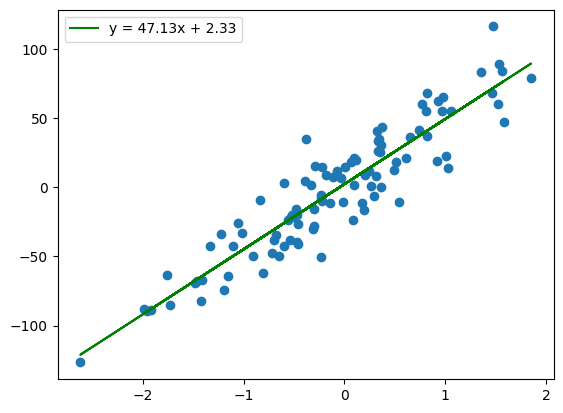

In [67]:
plt.scatter(X,y)
plt.plot(X,y_pred1,color='green',label=f"y = {gd.m:.2f}x + {gd.b:.2f}")
plt.legend()

In [51]:
def r2score(a, b):
    ssr = np.sum((a.ravel() - b.ravel()) ** 2)               
    sst = np.sum((a.ravel() - np.mean(a.ravel())) ** 2)       
    return 1 - (ssr / sst)
r2score(y,y_pred1)


0.8531541774966872

-2.5643921521384936